In [1]:
# Simple Linear Regression: It is a equation of straight line with one independent variable (x) and one dependent variable (y).
                          # Equation: y=B0 + B1*x
                          # Coefficients: B1 and intercept: B0
# Multiple Linear Regression: It is a pair of lines with one dependent variable and more than one dependent variable.
                          # Equation: y=B0 + B1*x + B2*x+B3*x+B4*x+B5*x+B6*x+...
                          # Coefficients: B1,B2,B3,... and intercept: B0

In [2]:
# Example for simple linear regression: You can measure the height of a person using weight as the only parameter (knowing his
# BMI which has a relation between height and weight (B1)) and hence x can be weight (independent) and 
# y can be height (dependent).

In [3]:
# Example for Multiple Linear Regression: You can calculate the house price (dependent variable -y) only if you know its
# features like number of bedrooms and bathrooms, size of the house, swimming pool,
# interiors finishing etc. (independent variable -x).

In [4]:
# Note: FeatureScaling is done on the independent variables since its change in its ratio doesnot have any impact on 

In [5]:
import pandas as pd

In [6]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv(path)

In [7]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.set_option("display.max_columns",None)

In [9]:
# This is a cleaned dataset and you must observe that all the values are converted to numeric. You can also observe that 
# dummy variables are used for location

In [10]:
# Now we split the data
x=df.drop(columns="price")
y=df["price"]
x.shape,y.shape

((7120, 107), (7120,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Now we split training and testing data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5696, 107), (5696,), (1424, 107), (1424,))

In [14]:
# We can observe that columns like bath, balcony are single digits, few of them are two digited numbers and few numbers have
# multiple digits. Hence we use feature scaling to rectify this.
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train=std_scaler.transform(x_train)
x_test=std_scaler.transform(x_test)

In [15]:
# Now we train the model (note: If the dataset is large, it may take time to train the model)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Now we give the model as an object
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
# Now, lets check the things learnt by our model (since it is a linear regression, it will learn the coefficients (B1,B2,..)
# and intercept (B0).

In [20]:
lr.coef_ # coefficients

array([-5.70206143e+00, -1.25679916e+00,  8.27341833e+01, -1.44906911e+01,
        5.75662723e+01,  1.88468905e-01, -1.72593897e+00, -4.51058311e+00,
       -2.22589244e+00, -4.28978455e+00, -2.44590976e+00,  5.40246226e-01,
       -1.03633400e+00,  1.43064873e+00, -6.25029424e-02, -1.51548783e+00,
       -2.14422789e-01,  2.16244155e+00, -1.48710228e+00,  1.95250816e+00,
       -3.10761125e+00, -1.28138668e+00, -1.01367155e+00,  1.37968545e-02,
        1.10383858e+00,  1.26497611e+00, -3.52405517e+00, -1.21398741e+00,
       -5.04622019e-01,  1.46299181e+00, -5.50064233e-01, -8.46468162e-02,
        6.84882188e-01, -1.39849820e+00, -1.94761710e-02, -1.57716300e+00,
        4.20886278e-01,  8.03443207e-01,  2.99182164e+00,  3.86430413e-03,
        1.05037261e-01,  2.89115612e-01, -3.16916626e-01,  1.05625868e+00,
       -1.39649279e+00, -3.10533604e+00,  1.01764011e-01, -7.49672917e-02,
       -8.03271555e-01, -1.27061856e+00, -8.54046164e-01,  2.64566484e-01,
        9.10688839e-01, -

In [21]:
lr.intercept_ # intercept

95.0802729985955

In [22]:
# Now we predict the house prices. Since we don't have any test data, we take the test data
# that was splitted by train_test_split() method.

In [53]:
x_test

array([[ 0.71301986,  0.0112734 ,  0.30202307, ..., -0.05630391,
        -0.05630391, -0.05138463],
       [-0.44274597,  0.55008644, -0.58028511, ..., -0.05630391,
        -0.05630391, -0.05138463],
       [ 1.86878568,  0.55008644,  0.62450413, ..., -0.05630391,
        -0.05630391, -0.05138463],
       ...,
       [-1.59851179,  0.55008644, -1.03304852, ..., -0.05630391,
        -0.05630391, -0.05138463],
       [-0.44274597, -0.74630813, -0.38550655, ..., -0.05630391,
        -0.05630391, -0.05138463],
       [-0.44274597, -2.0427027 ,  0.12917322, ..., -0.05630391,
        -0.05630391, -0.05138463]])

In [24]:
lr.predict([x_test[0]])

array([76.90661876])

In [25]:
# This is the predicted price of the house with the above mentioned parameters.

In [26]:
# To predict all the test data we can simply take the test dataset
y_pred=lr.predict(x_test)
y_pred

array([ 76.90661876,  15.25005377, 113.6828165 , ...,  21.30296864,
        71.43462962, 230.0414626 ])

In [27]:
# Now lets compare its values with the y_test values
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64

In [28]:
# You can observe that both predicted values and the y-test values are nearly same

In [29]:
# To test its accuracy, we can use the method score(predicted values, actual values).

In [30]:
lr.score(x_test, y_test)

0.7903837092682257

In [31]:
# We can observe that our model is 79% accurate which is good enough to deploy a model. You can increase its accuracy
# either by adding or removing columns while data cleaning or change the ML algorithm.

In [32]:
x.keys()

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Whitefield',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=107)

In [33]:
import numpy as np

In [37]:
y_test=np.array(y_test)
y_test

array([ 80.,  40., 120., ...,  32.,  63., 180.])

In [38]:
import matplotlib.pyplot as plt

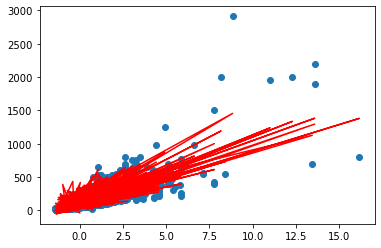

In [78]:
plt.scatter(x_train[:,2],y_train)
plt.plot(x_train[:,2],lr.predict(x_train),color='r')

In [63]:
x.keys()

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Whitefield',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=107)

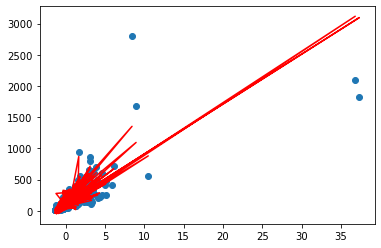

In [79]:
plt.scatter(x_test[:,2],y_test)
plt.plot(x_test[:,2],y_pred,color='r')

In [80]:
x_test.shape

(1424, 107)

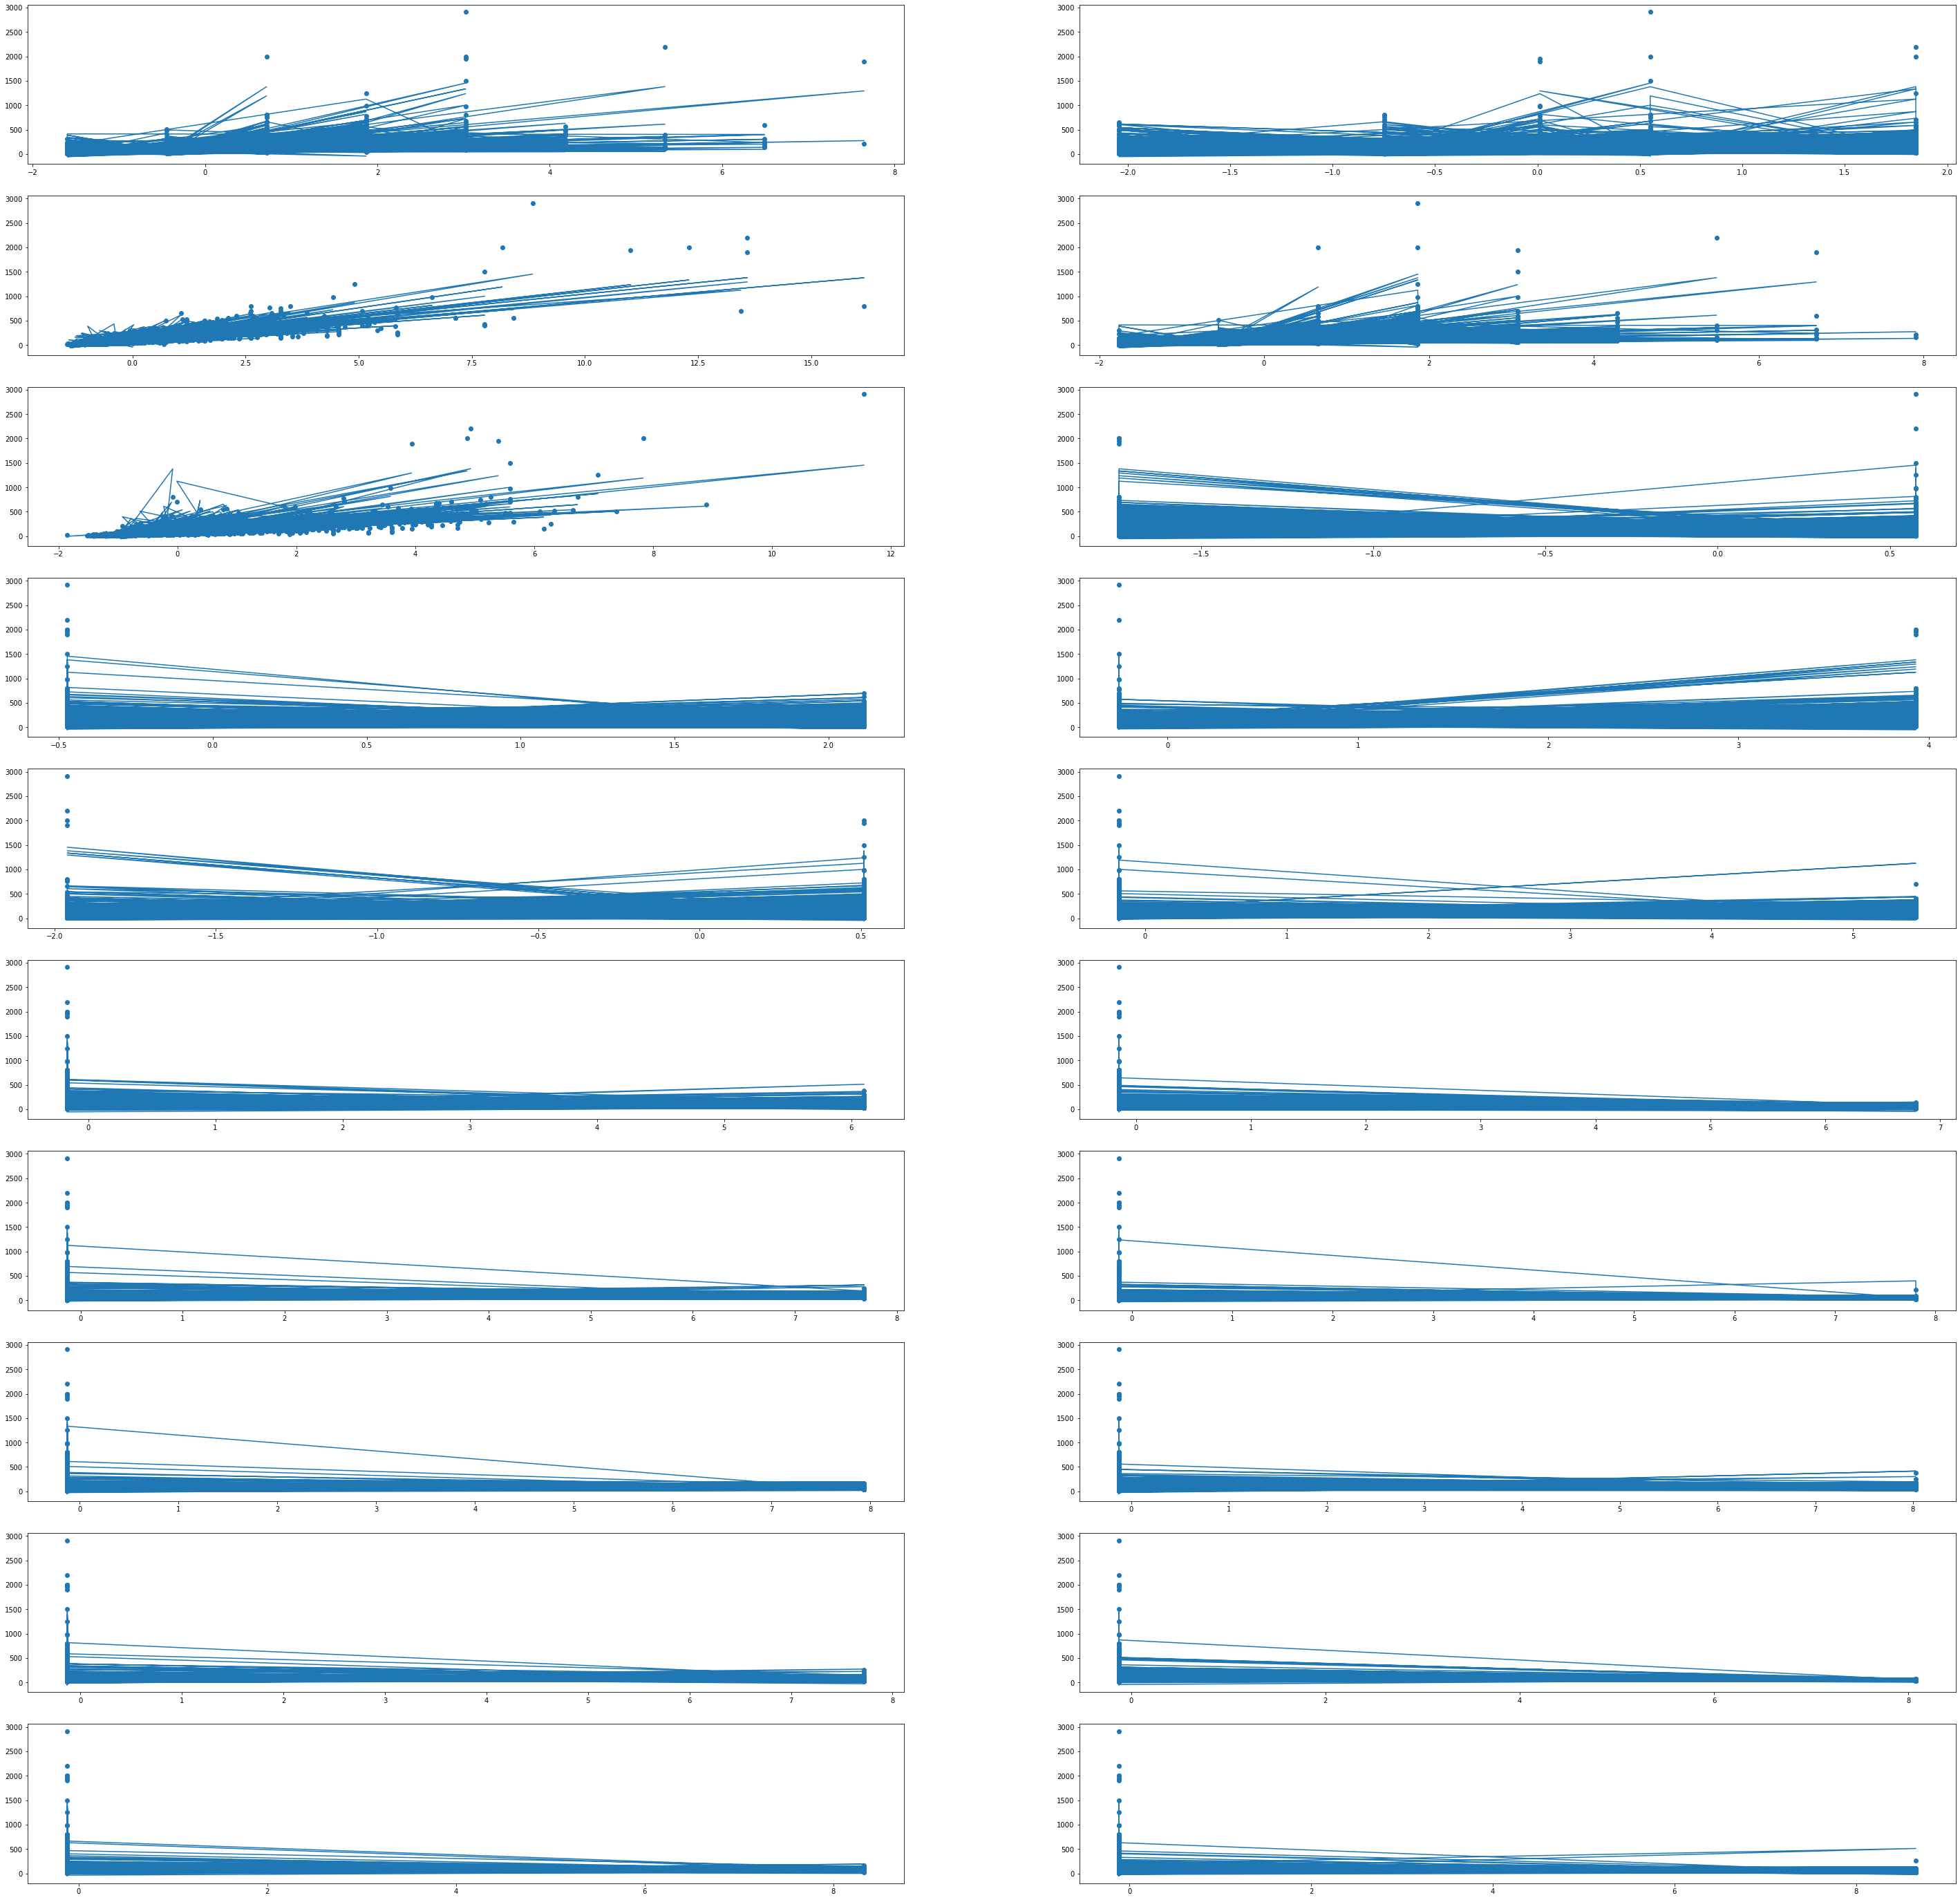

In [90]:
plt.figure(figsize=[50,50])
for i in range(0,20):
    plt.subplot(10,2,i+1)
    plt.scatter(x_train[:,i],y_train)
    plt.plot(x_train[:,i],lr.predict(x_train))

In [91]:
import seaborn as sns

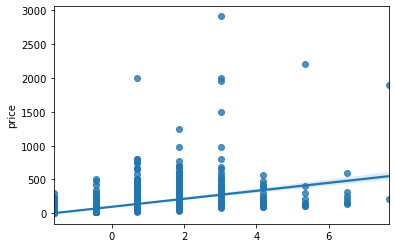

In [92]:
sns.regplot(x_train[:,0],y_train)

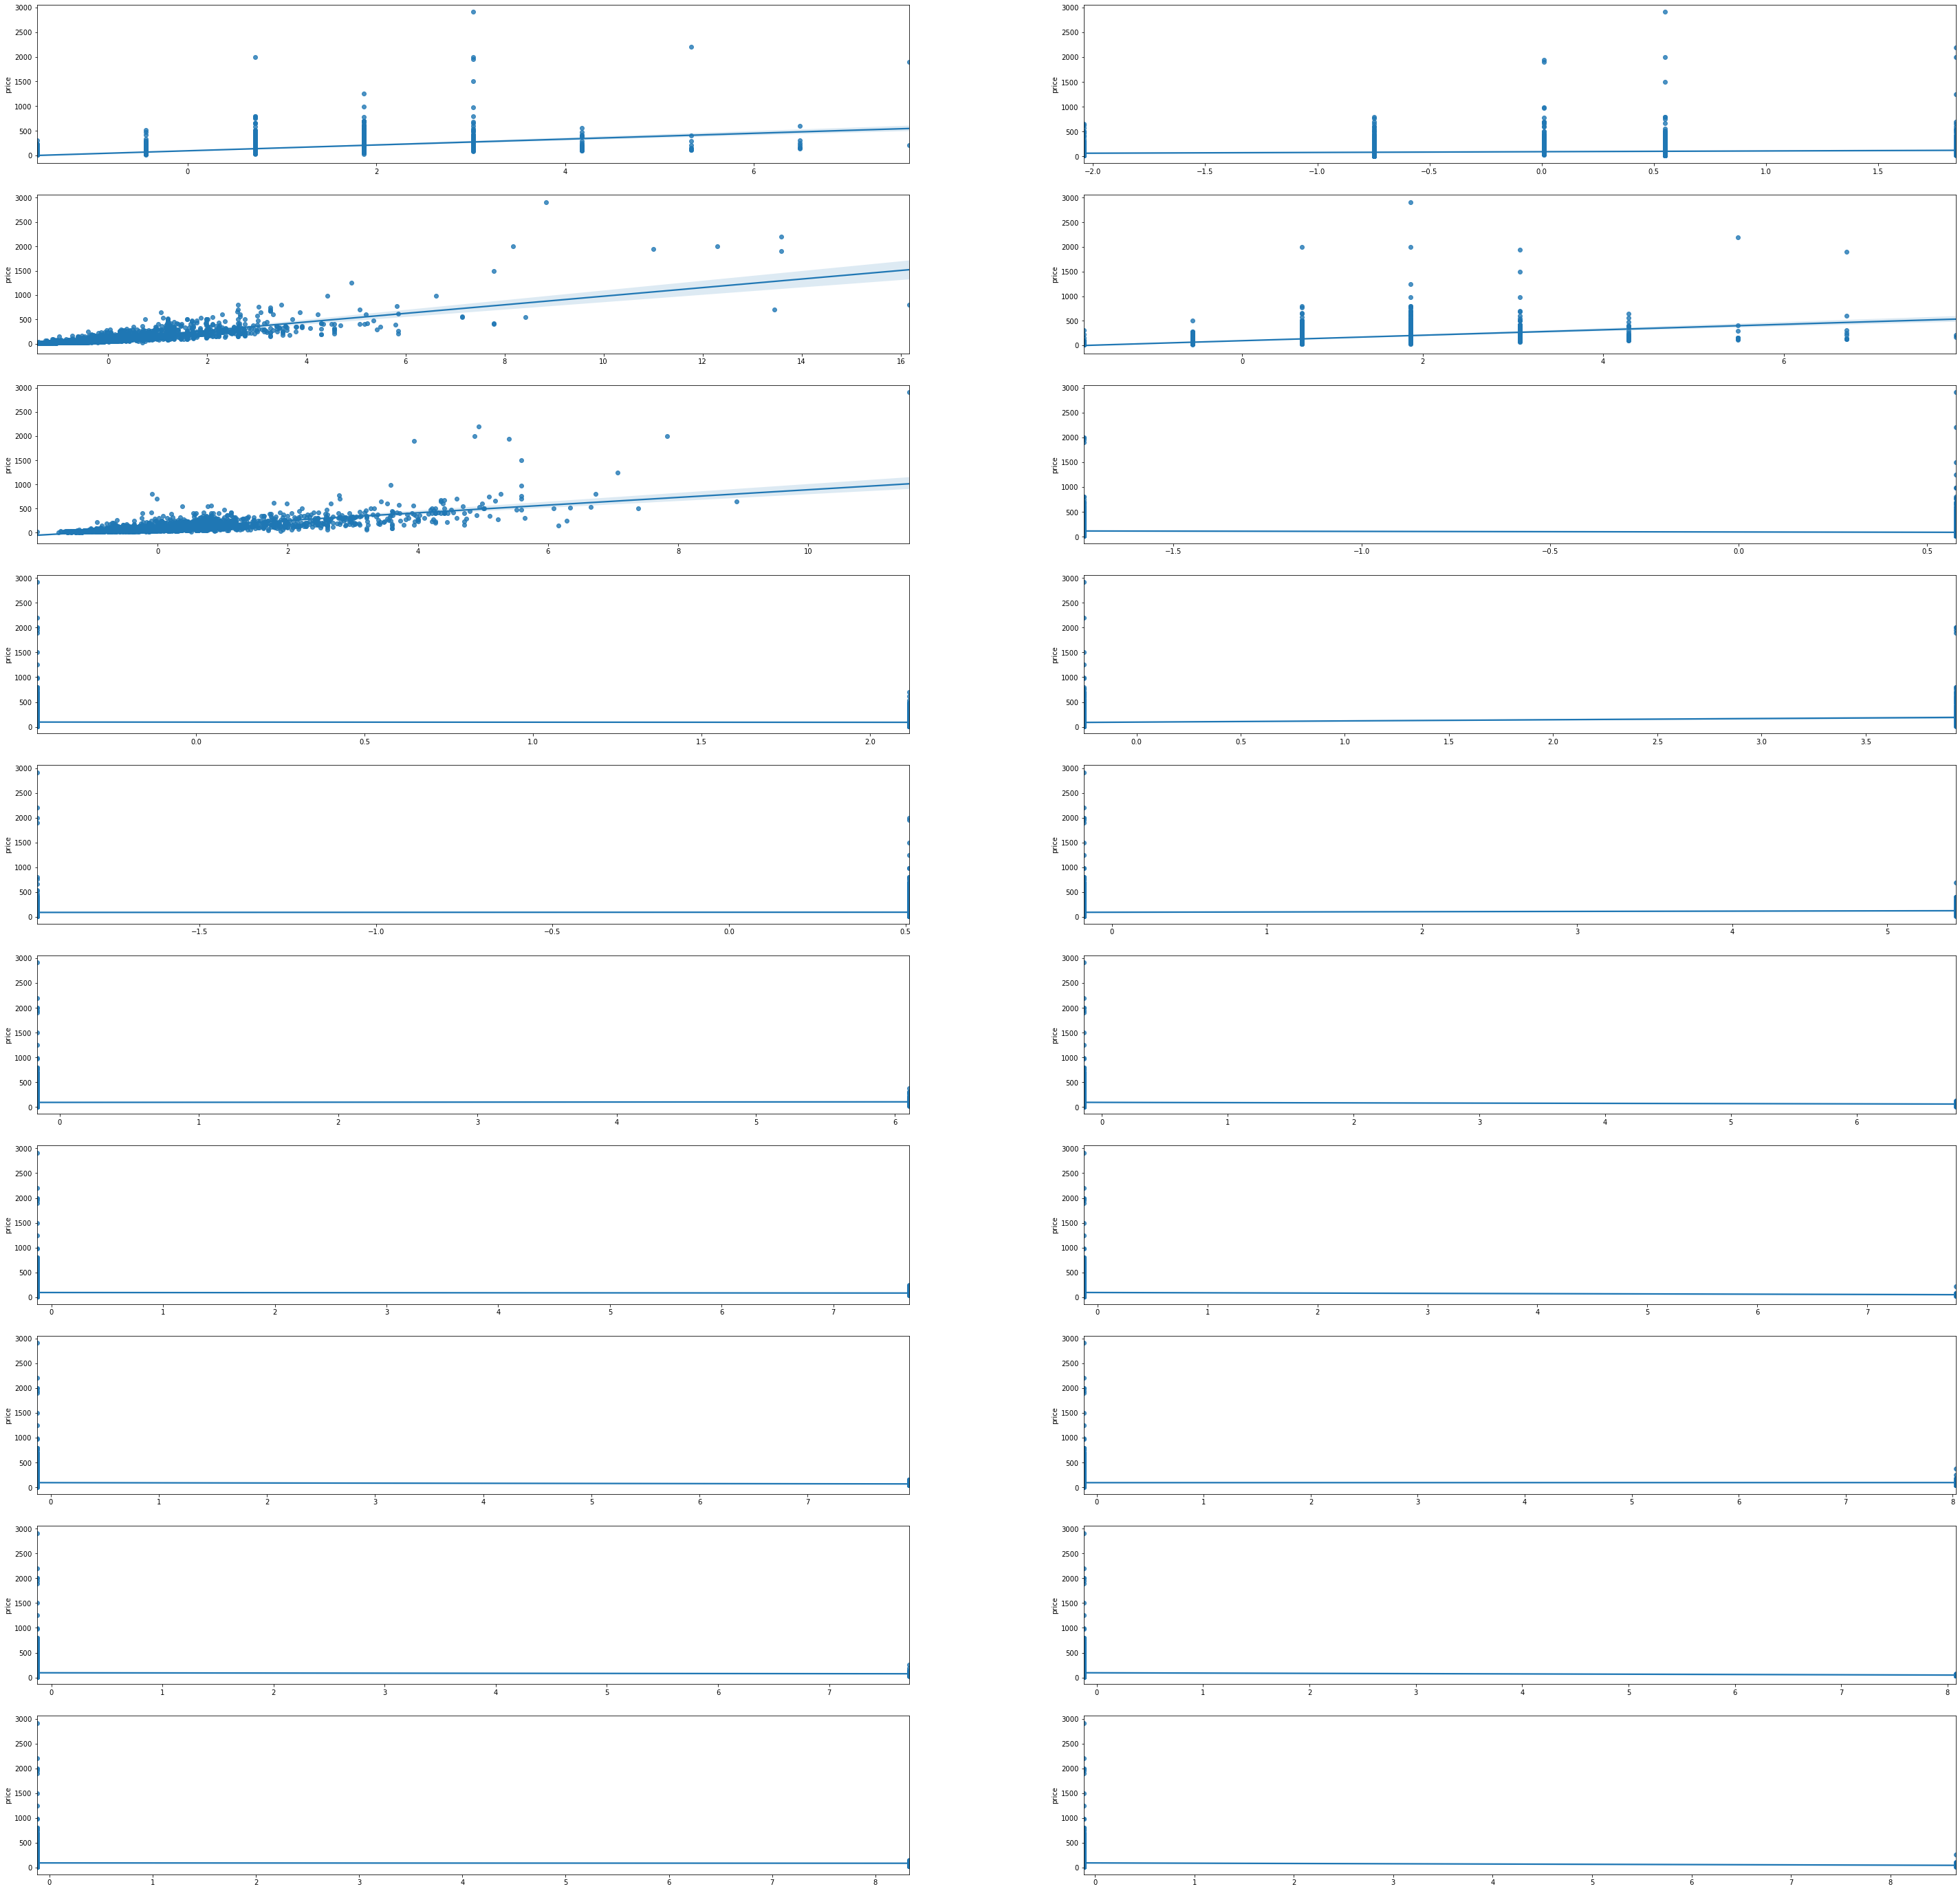

In [93]:
plt.figure(figsize=[50,50])
for i in range(0,20):
    plt.subplot(10,2,i+1)
    sns.regplot(x_train[:,i],y_train)

In [94]:
# To draw regression plots, you can use regplot() from seaborn

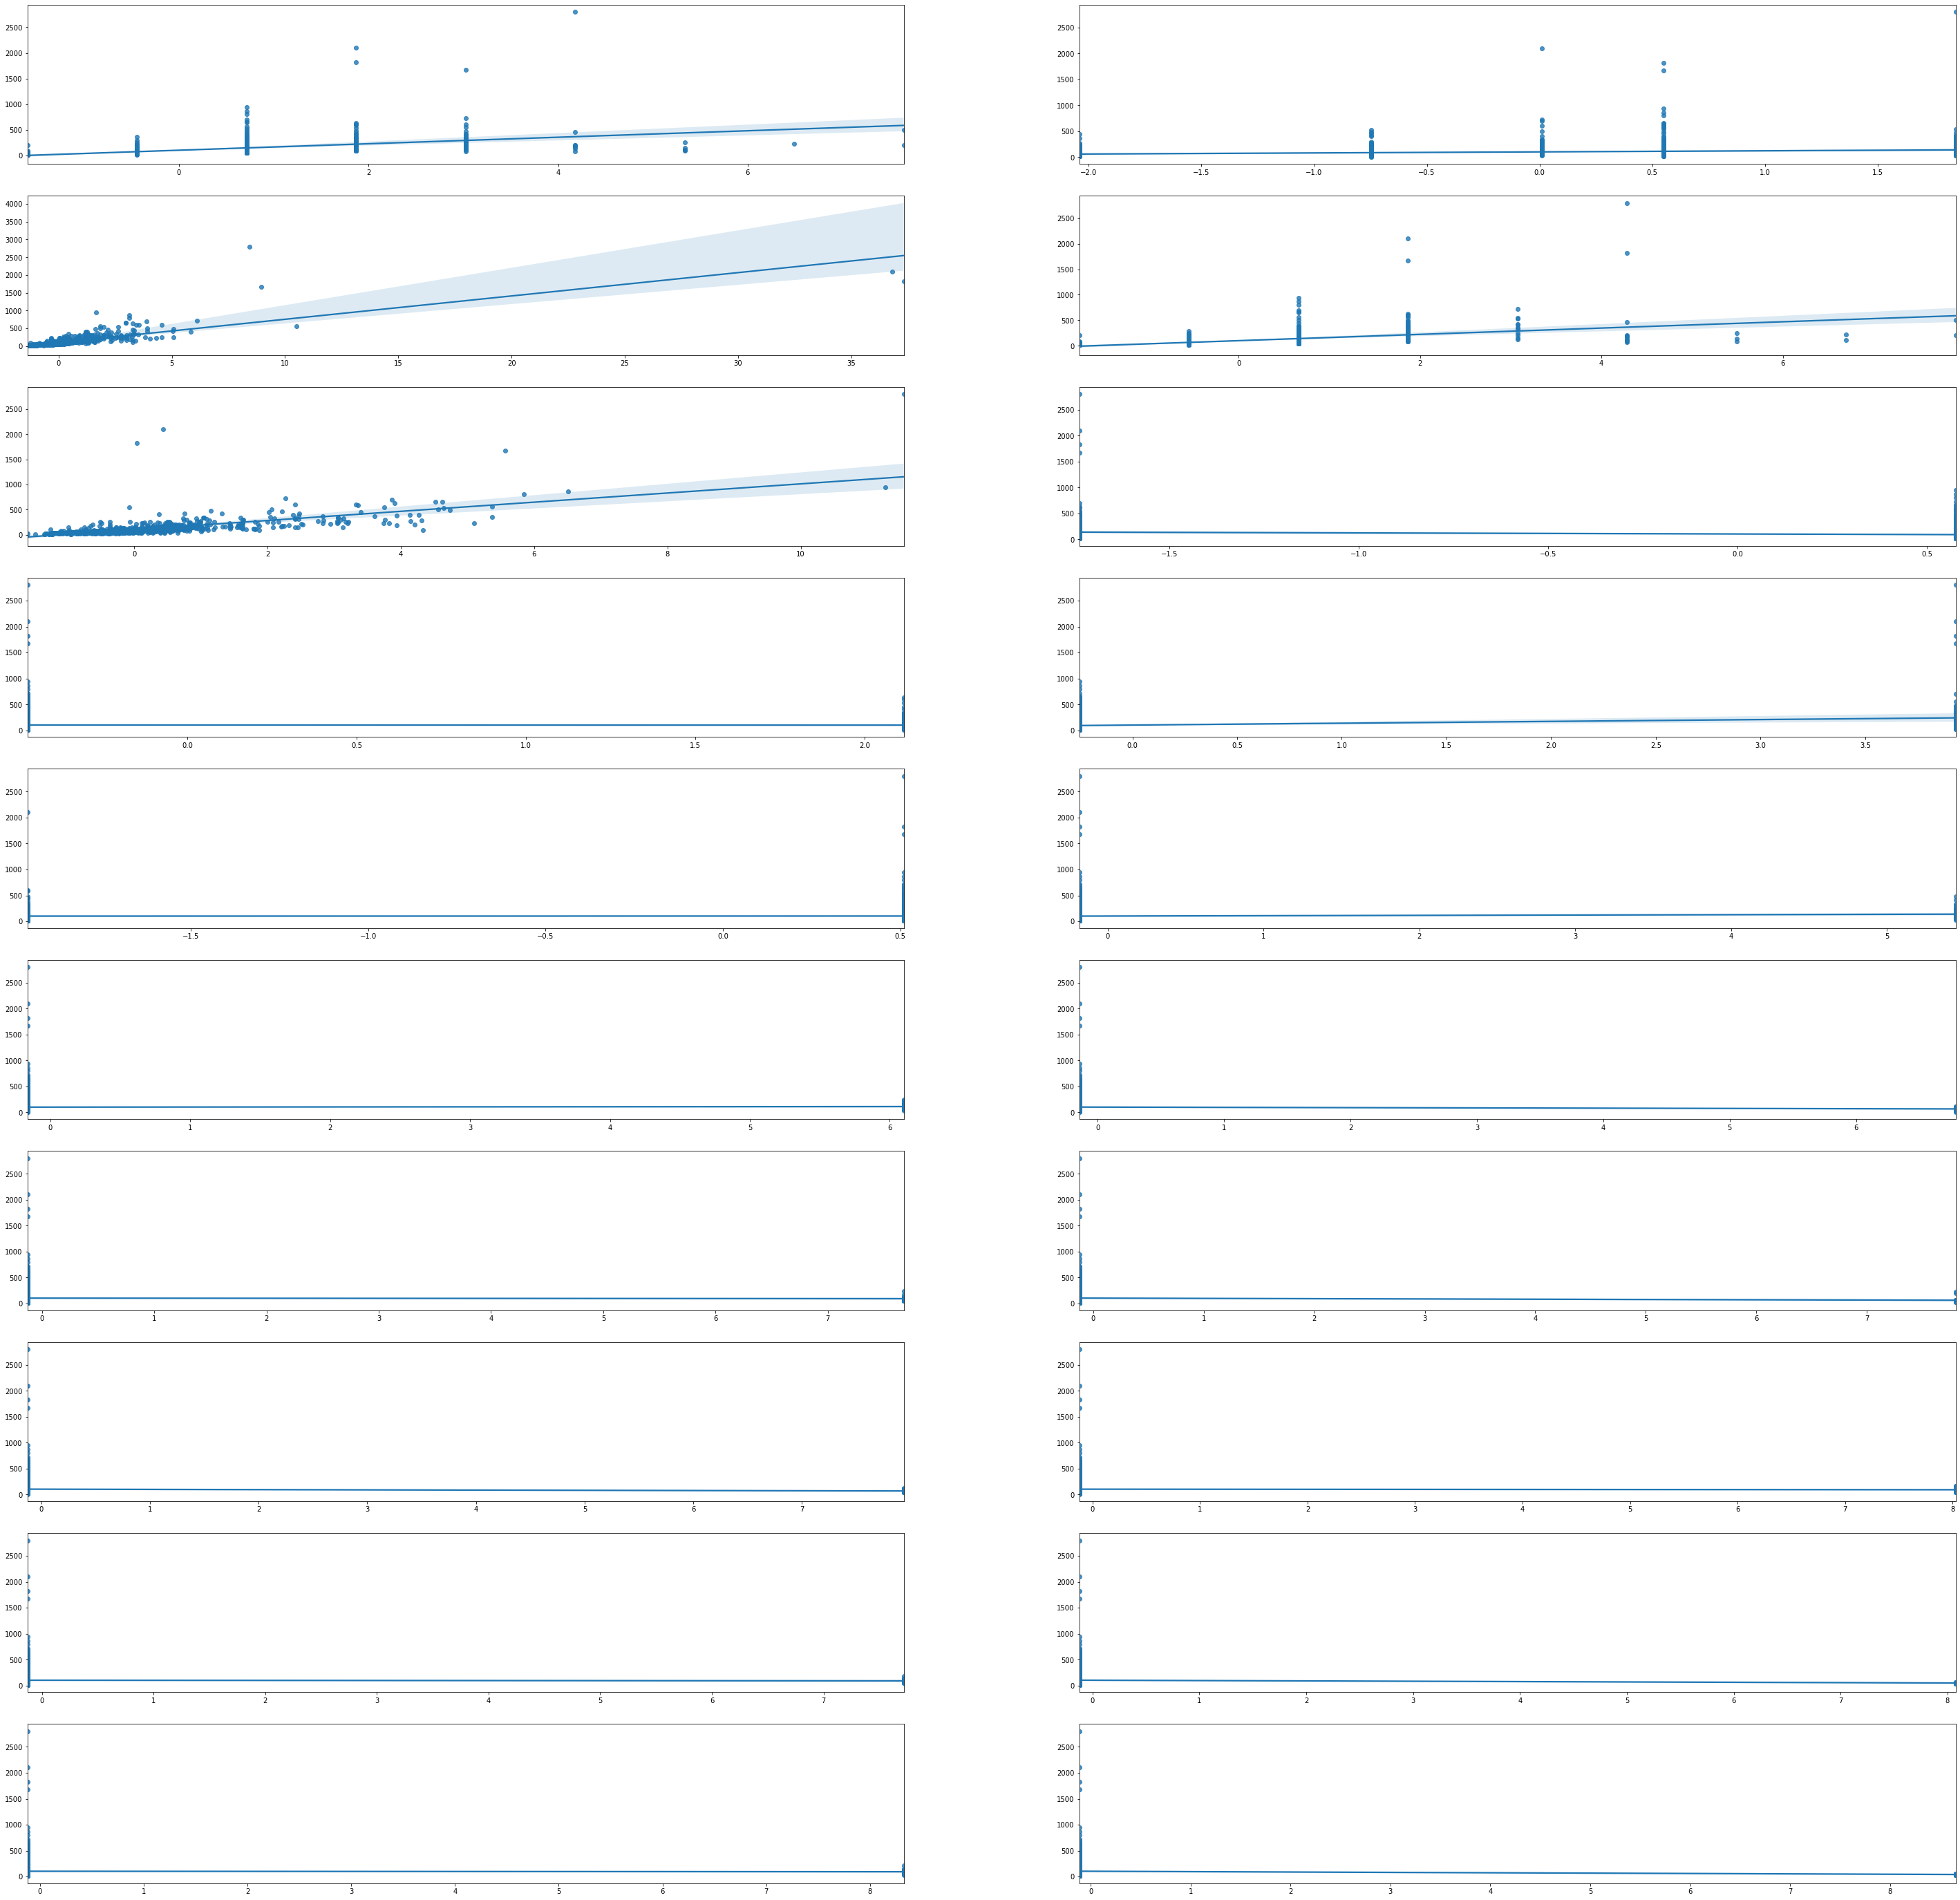

In [95]:
plt.figure(figsize=[50,50])
for i in range(0,20):
    plt.subplot(10,2,i+1)
    sns.regplot(x_test[:,i],y_test)

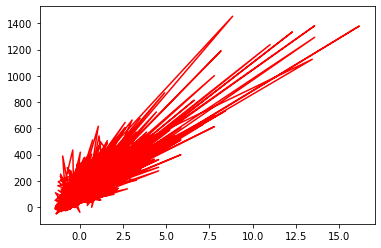

In [96]:
plt.plot(x_train[:,2],lr.predict(x_train),color='r')

In [97]:
# You are not getting proper line plots using matplotlib because the values sometimes increase and sometimes decrease.
# Hence, the graph moves in a zig-zag manner.

In [98]:
# Hence, using regplot is a better way to draw regression plots.